In [1]:
from keras.datasets import mnist

(train_x, train_y), (test_a, test_b) = mnist.load_data()

print(train_x.shape, train_y.shape)
print(test_a.shape, test_b.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
from tensorflow.keras.utils import to_categorical

num_classes = 10

train_x0 = train_x.reshape(train_x.shape[0], 28, 28, 1)
train_y0 = train_y

train_x = train_x0[:40000]
valid_x = train_x0[40000:50000]
test_x = train_x0[50000:]

train_y = train_y0[:40000]
valid_y = train_y0[40000:50000]
test_y = train_y0[50000:]

input_shape = (28, 28, 1)

train_x = train_x.astype('float32') / 255
valid_x = valid_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

train_y = to_categorical(train_y, num_classes)
valid_y = to_categorical(valid_y, num_classes)
test_y = to_categorical(test_y, num_classes)

print('train_x shape:', train_x.shape)
print(train_x.shape[0], 'train samples')
print(valid_x.shape[0], 'valid samples')
print(test_x.shape[0], 'test samples')

train_x shape: (40000, 28, 28, 1)
40000 train samples
10000 valid samples
10000 test samples


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
epochs = 20

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy'])

In [4]:
hist = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_x, valid_y))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/20
313/313 [==============================] - 36s 19ms/step - loss: 0.2217 - accuracy: 0.9316 - val_loss: 0.0708 - val_accuracy: 0.9773
Epoch 2/20
313/313 [==============================] - 5s 18ms/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0766 - val_accuracy: 0.9763
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0524 - val_accuracy: 0.9835
Epoch 4/20
313/313 [==============================] - 5s 18ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0483 - val_accuracy: 0.9848
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0482 - val_accuracy: 0.9859
Epoch 6/20
313/313 [==============================] - 5s 18ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0532 - val_accuracy: 0.9841
Epoch 7/20
313/313 [==============================] - 5s 18ms/step - loss: 0.0284 - accuracy: 0.9920 - val_loss: 0.0440 - val_accuracy: 0.988

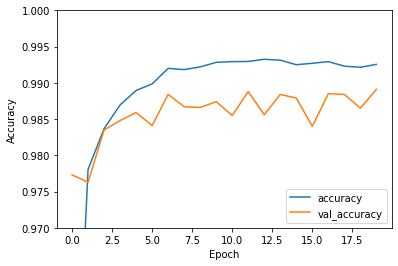

In [5]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.97, 1])
plt.legend(loc='lower right')

In [6]:
batch_size = 128
epochs = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=categorical_crossentropy,optimizer=RMSprop(),metrics=['accuracy'])

In [7]:
hist = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_x, valid_y))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/7
313/313 [==============================] - 7s 19ms/step - loss: 0.2298 - accuracy: 0.9286 - val_loss: 0.0802 - val_accuracy: 0.9739
Epoch 2/7
313/313 [==============================] - 6s 18ms/step - loss: 0.0756 - accuracy: 0.9776 - val_loss: 0.0831 - val_accuracy: 0.9739
Epoch 3/7
313/313 [==============================] - 5s 18ms/step - loss: 0.0571 - accuracy: 0.9828 - val_loss: 0.0502 - val_accuracy: 0.9849
Epoch 4/7
313/313 [==============================] - 6s 18ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 5/7
313/313 [==============================] - 5s 17ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0430 - val_accuracy: 0.9864
Epoch 6/7
313/313 [==============================] - 5s 18ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 7/7
313/313 [==============================] - 5s 17ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0430 - val_accuracy: 0.9860
The mo

In [8]:
score = model.evaluate(test_x, test_y, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03695744276046753
Test accuracy: 0.9890999794006348


In [9]:
test_a = test_a.reshape(test_a.shape[0], 28, 28, 1)

test_a = test_a.astype('float32') / 28

test_b = to_categorical(test_b, num_classes)

In [10]:
score = model.evaluate(test_a, test_b, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33705398440361023
Test accuracy: 0.9879999756813049
